<a href="https://colab.research.google.com/github/pb-roshith/Hate-Speech-Detection-using-LSTM/blob/main/Hate_Speech_Detection_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/labeled_data.csv")

In [3]:
df.shape

(24783, 7)

In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], inplace=True)

**0 - hate speech**

**1 - offensive language**

**2 - neither**




In [9]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
df.isna().sum()

,0
class,0
tweet,0


In [11]:
df.shape

(24783, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [14]:
df['tweet'][0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [15]:
df['tweet'].iloc[0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [16]:
df['tweet'][100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

In [17]:
df['processed_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z]', ' ', regex=True)

In [18]:
df.head()

,class,tweet,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [19]:
df['processed_tweet'][100]

'  ClicquotSuave  LMAOOOOOOOOOOO this nigga  Krillz Nuh Care http   t co AAnpSUjmYI   lt bitch want likes for some depressing shit  foh'

In [20]:
df['tweet'][1000]

'&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;"@betysweetcocker: That pussy is just....&#128561; imma assume she just had a baby like..the day before"'

In [21]:
df['processed_tweet'][1000]

'                                                                 betysweetcocker  That pussy is just              imma assume she just had a baby like  the day before '

In [22]:
df['processed_tweet'] = df['processed_tweet'].str.replace(r'[\s]+', ' ', regex=True)

In [24]:
df['processed_tweet'][1000]

' betysweetcocker That pussy is just imma assume she just had a baby like the day before '

In [25]:
df.drop(columns=['tweet'], inplace=True)

In [26]:
df.head()

,class,processed_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


In [27]:
import spacy

In [28]:
nlp = spacy.load('en_core_web_sm')

In [29]:
def lemmatization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)

In [30]:
df['lemmaList'] = df['processed_tweet'].apply(lemmatization)

In [31]:
df.head()

,class,processed_tweet,lemmaList
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [36]:
df['processed_tweet'][300]

' rapdreams bitches hold they nigga down when he get locked up but if a nigga go to college or the military it s a different story '

In [37]:
df['lemmaList'][300]

'  rapdream bitch hold they nigga down when he get lock up but if a nigga go to college or the military it s a different story'

In [38]:
def remove_stopwords(text):
  doc = nlp(text)
  no_stopwords = [word.text for word in doc if not word.is_stop]
  return ' '.join(no_stopwords)

In [39]:
df['no_stopwords'] = df['lemmaList'].apply(remove_stopwords)

In [40]:
df['no_stopwords'][300]

'   rapdream bitch hold nigga lock nigga college military s different story'

In [41]:
df.head()

,class,processed_tweet,lemmaList,no_stopwords
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [45]:
df.drop(columns=['processed_tweet', 'lemmaList'], inplace=True)

In [46]:
df.rename(columns={'no_stopwords':'final_tweet'}, inplace=True)

In [47]:
df.head()

,class,final_tweet
0,2,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts shit hear true faker bitc...


In [43]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.9 MB/s eta 0:00:00


In [44]:
from tensorflow.keras.preprocessing.text import one_hot

In [48]:
vocab_size = 10000
one_hot_representation = [one_hot(words, vocab_size) for words in df['final_tweet']]

In [49]:
df['final_tweet'][0]

'   RT mayasolovely woman shouldn t complain clean house amp man trash'

In [50]:
one_hot_representation[0]

[6976, 5367, 3917, 1460, 8877, 475, 7556, 4848, 5074, 8137, 5293]

In [51]:
for i in range(0, 5):
  print(df['final_tweet'][i])

   RT mayasolovely woman shouldn t complain clean house amp man trash
   RT mleew boy dat cold tyga dwn bad cuffin dat hoe st place
   RT UrKindOfBrand Dawg RT sbaby life fuck bitch start cry confuse shit
   RT C G Anderson viva base look like tranny
   RT ShenikaRoberts shit hear true faker bitch tell ya


In [52]:
for i in range(0, 5):
  print(one_hot_representation[i])

[6976, 5367, 3917, 1460, 8877, 475, 7556, 4848, 5074, 8137, 5293]
[6976, 1088, 5380, 5105, 500, 8395, 5446, 1671, 7729, 5105, 148, 7818, 6208]
[6976, 8571, 6313, 6976, 2966, 5210, 1436, 8901, 3253, 9518, 3211, 4975]
[6976, 3960, 8141, 2303, 1886, 4484, 8658, 7924, 2505]
[6976, 2384, 4975, 488, 8222, 5915, 8901, 2495, 9173]


In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [54]:
sentence_length = 20
embedded_tweet = pad_sequences(one_hot_representation, padding='pre', maxlen=sentence_length)

In [55]:
for i in range(0, 5):
  print(embedded_tweet[i])

[   0    0    0    0    0    0    0    0    0 6976 5367 3917 1460 8877
  475 7556 4848 5074 8137 5293]
[   0    0    0    0    0    0    0 6976 1088 5380 5105  500 8395 5446
 1671 7729 5105  148 7818 6208]
[   0    0    0    0    0    0    0    0 6976 8571 6313 6976 2966 5210
 1436 8901 3253 9518 3211 4975]
[   0    0    0    0    0    0    0    0    0    0    0 6976 3960 8141
 2303 1886 4484 8658 7924 2505]
[   0    0    0    0    0    0    0    0    0    0    0 6976 2384 4975
  488 8222 5915 8901 2495 9173]


In [56]:
x = np.array(embedded_tweet)
y = np.array(df['class'])

In [57]:
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [60]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.1 MB/s eta 0:00:00


In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x, y)

In [78]:
x.shape

(42543, 20)

In [79]:
y.shape

(42543,)

In [71]:
class_0 = list(y).count(0)
class_0

19190

In [72]:
class_1 = list(y).count(1)
class_1

19190

In [73]:
class_2 = list(y).count(2)
class_2

4163

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
x_train.shape

(34034, 20)

In [77]:
x_test.shape

(8509, 20)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [84]:
dimension = 50

model = Sequential()
model.add(Embedding(vocab_size, dimension, input_length=sentence_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(3, activation='softmax'))

In [87]:
model.build(input_shape=(None, sentence_length))

In [88]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 20, 50)         │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 20, 100)        │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 20, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,953 (2.33 MB)

 Trainable params: 610,953 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.9645 - loss: 0.1144 - val_accuracy: 0.9052 - val_loss: 0.2999
Epoch 2/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.9725 - loss: 0.0928 - val_accuracy: 0.9045 - val_loss: 0.3637
Epoch 3/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.9781 - loss: 0.0741 - val_accuracy: 0.8980 - val_loss: 0.4170
Epoch 4/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.9825 - loss: 0.0613 - val_accuracy: 0.9019 - val_loss: 0.4426
Epoch 5/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.8923 - val_loss: 0.4958
Epoch 6/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.9876 - loss: 0.0410 - val_accuracy: 0.8935 - val_loss: 0.5124
Epoch 7/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.9917 - loss: 0.0286 - val_accuracy: 0.8911 - val_loss: 0.6064
Epoch 8/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.9927 - loss: 0.0234 - 

In [94]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model Accuracy : {accuracy*100}")

266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8932 - loss: 0.6400
Model Accuracy : 88.92936706542969


In [96]:
pred = np.argmax(model.predict(x_test), axis = -1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3812
           1       0.90      0.92      0.91      3807
           2       0.74      0.72      0.73       890

    accuracy                           0.89      8509
   macro avg       0.85      0.85      0.85      8509
weighted avg       0.89      0.89      0.89      8509



Text(50.722222222222214, 0.5, 'ACTUAL')

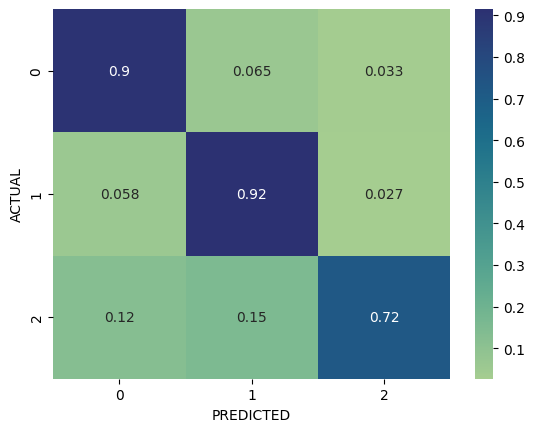

In [99]:
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest')
plt.xlabel('PREDICTED'),
plt.ylabel('ACTUAL')

In [110]:
import re

def pred(user_input_text):
  # Preprocess the user input
  processed_text = user_input_text.lower() # convert to lowercase
  processed_text = re.sub(r'[^a-zA-Z]', ' ', processed_text)
  processed_text = re.sub(r'[\s]+', ' ', processed_text)

  # Lemmatize the text
  doc = nlp(processed_text)
  lemmaList = [word.lemma_ for word in doc]
  lemmatized_text = ' '.join(lemmaList)

  # Remove stop words
  doc = nlp(lemmatized_text)
  no_stopwords = [word.text for word in doc if not word.is_stop]
  final_text = ' '.join(no_stopwords)

  # One-hot encode and pad the input
  onehot_rep = [one_hot(final_text, vocab_size)]
  embedded_tweet = pad_sequences(onehot_rep, padding='pre', maxlen=sentence_length)

  # Predict the class
  prediction = np.argmax(model.predict(np.array(embedded_tweet)), axis=-1)

  # Return the prediction
  output = prediction[0]

  if output == 0:
    return "Hate Speech"
  elif output == 1:
    return "Offensive Language"
  else:
    return "Neither"

In [111]:
pred("!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


'Neither'

In [112]:
pred("suprise mother fucker")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


'Offensive Language'